<a href="https://colab.research.google.com/github/CJL-INVEST/invest/blob/main/LAA_korea_choi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 install 및 import

In [226]:
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [227]:
!pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Finace Data Reader
 for Unemployment Rate form FRED (미국 실업률)

In [228]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [229]:
import pandas as pd
from datetime import datetime, timedelta
import math
import finterstellar as fs
import quantstats as qs
import FinanceDataReader as fdr

In [230]:
start_day = datetime(2018,10,25)
end_day = datetime(2022,11,30)

# 한국ETF로 변화
## 공격자산
 * IWD (미국 대형가치주)  -> KINDEX 미국WideMoat가치주(309230) -> 있음.
   > [ KODEX 골드 선물(H) (132030) ]
    > * 개시일: 2018-10-25
    > * S&P GSCI Gold Index(TR) 추종
    > * 총자산: 1,194억, 거래대금: 6억
    > * 수수료: 0.40%
    > 출처: http://www.kindexetf.com/fund/getFundInfo.etf?fundCD=9001N&leftMenuNo=24&tabMenuNo=1
 * GLD (금) ->  KODEX 골드 선물(H) (132030) -> 연금에 없음.
  > [ KODEX 골드 선물(H) (132030) ]
    > * 개시일: 2010-10-01
    > * S&P GSCI Gold Index(TR) 추종
    > * 총자산: 1,884억, 거래대금: 7.5억
    > * 수수료: 0.680%
    
  > [ TIGER 골드 선물(H) (319640) ]
    > * 개시일: 2019-04-09
    > * S&P GSCI Gold Index(TR) 추종
    > * 총자산: 249억, 거래대금: 1.5억
    > * 수수료: 0.390%
    출처: https://m.blog.naver.com/woongoni/222035220665
 * IEF (미국중기채) -> TIGER 미국채10년선물 (305080)

## 수비자산
 * QQQ (나스닥100지수) -> TIGER 미국나스닥100 (133690)
   > [ TIGER 미국나스닥100 (133690) ]
    > * 개시일: 2010-10-18
    > * 총자산: 20,584억, 거래대금: 177억
    > * 수수료: 0.07%
    > 출처: https://www.tigeretf.com/ko/product/search/detail/index.do?ksdFund=KR7133690008
    > 출처: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201030105
 * SHY (미국단기채) -> KOSEF 통안채1년 (122260)
  > [ KOSEF 통안채1년 (122260) ]
    > * 개시일: 2010-01-14
    > KIS MSB 지수
    > * 총자산: 465억, 거래대금: 2천
    > * 수수료: 0.15%

  > [ KBSTAR 단기국공채액티브 (272560) ]
    > * 개시일: 2017-06-29
    > KIS MSB 지수
    > * 총자산: 817억, 거래대금: 4천
    > * 수수료: 0.13%

  > [ KBSTAR 단기통안채 (196230) ]
    > * 개시일: 2014-05-19
    > * KIS MSB 5M Index
    > * 총자산: 5147억, 거래대금: 72억
    > * 수수료: 0.13%
  > * 출처: https://lazyquant.tistory.com/entry/미국-ETF와-유사한-국내-ETF-찾기 [게으른 퀀트]

 
## 백테스트 기간
 * 2018년부터


출처: https://lazyquant.tistory.com/entry/연금저축-ETF로-LAA-전략-운영하기 [게으른 퀀트]


In [231]:
# RU: Risky Universe, CU: Cash Universe, ES: EconomySituation, BU: Benchmark Universe
RU = ['309230', '132030', '305080'] # invest 25% per each item and rebalance every year
RU_NAME=['KINDEX_미국WideMoat가치주','KODEX_골드선물', 'TIGER_미국채10년선물']
CU = ['133690', '148070'] # choose one of them according to the policy and rebalance every month
CU_NAME=['TIGER미국나스닥100','KOSEF_통안채1년']
ES = ['^GSPC']
ES2= ['UNRATE'] # unemployment rate
BU = ['^GSPC', '^IXIC', '^KS11', '^KQ11'] # 지수: S&P500, 나스닥, 코스피, 코스닥

In [232]:
MA_QQQ = 200  # 200일 평균
MA_UNRATE = 12  # 12개월

# ES 데이터 가져오기

미국 실업률 (ES2)

In [233]:
df_ES2 = fdr.DataReader('FRED:UNRATE', start=(start_day - timedelta(days=365)))

In [234]:
df_ES2.tail(5)

,UNRATE
DATE,
2022-06-01,3.60
2022-07-01,3.50
2022-08-01,3.70
2022-09-01,3.50
2022-10-01,3.70


In [235]:
es_col_list = ['MA12' for col in df_ES2[ES2].columns]
es_col_list

['MA12']

ES2 이동 평균선 구하기

In [236]:
df_ES2_ma12 = df_ES2[ES2].rolling(window=MA_UNRATE).mean()
df_ES2_ma12

,UNRATE
DATE,
2017-10-01,NaN
2017-11-01,NaN
2017-12-01,NaN
2018-01-01,NaN
2018-02-01,NaN
...,...
2022-06-01,4.18
2022-07-01,4.02
2022-08-01,3.90


In [237]:
df_ES2[es_col_list] = df_ES2_ma12
df_ES2

,UNRATE,MA12
DATE,,
2017-10-01,4.20,NaN
2017-11-01,4.20,NaN
2017-12-01,4.10,NaN
2018-01-01,4.00,NaN
2018-02-01,4.10,NaN
...,...,...
2022-06-01,3.60,4.18
2022-07-01,3.50,4.02
2022-08-01,3.70,3.90


S&P 데이터 (ES)

In [238]:
df_ES = pd.DataFrame(columns=ES)
for ticker in ES:
  df_ES[ticker] = fs.get_ohlc(ticker, start_day - timedelta(days=365), end_day)['Adj Close']  

In [239]:
df_ES

,^GSPC
Date,
2017-10-25,"2,557.15"
2017-10-26,"2,560.40"
2017-10-27,"2,581.07"
2017-10-30,"2,572.83"
2017-10-31,"2,575.26"
...,...
2022-11-22,"4,003.58"
2022-11-23,"4,027.26"
2022-11-25,"4,026.12"


ES2에 대한 이동 평균선
 Calculate Moving Average




In [240]:
es_col_list = ['MA200' for col in df_ES[ES].columns]
es_col_list



['MA200']

In [241]:
df_ES_ma200 = df_ES[ES].rolling(window=MA_QQQ).mean()
df_ES_ma200


,^GSPC
Date,
2017-10-25,NaN
2017-10-26,NaN
2017-10-27,NaN
2017-10-30,NaN
2017-10-31,NaN
...,...
2022-11-22,"4,062.19"
2022-11-23,"4,059.72"
2022-11-25,"4,056.91"


In [242]:
df_ES[es_col_list] = df_ES_ma200
df_ES

,^GSPC,MA200
Date,,
2017-10-25,"2,557.15",NaN
2017-10-26,"2,560.40",NaN
2017-10-27,"2,581.07",NaN
2017-10-30,"2,572.83",NaN
2017-10-31,"2,575.26",NaN
...,...,...
2022-11-22,"4,003.58","4,062.19"
2022-11-23,"4,027.26","4,059.72"
2022-11-25,"4,026.12","4,056.91"


#경제 상황 판단 근거
불황기 판단 근거

S&P 500 < MA200 of S&P500

**and**

UNRATE > MA12 of UNRATE

In [243]:
def get_economic_status(x, y):
  asset = pd.Series([0], index=['selected'])
  if (x['^GSPC'] < x['MA200']) and (y['UNRATE'] > y['MA12']):
    selected = CU_NAME[0]
  else:
    selected = CU_NAME[1]
  
  asset['selected'] = selected
  return asset

In [244]:
def get_es2_item(x):
  y = None
  for i in range(len(df_ES2)):
    y = df_ES2.iloc[i]
    if (x.name.year == y.name.year) and (x.name.month == y.name.month):
      return y
  return y


In [245]:
df_ES = df_ES.resample('MS').first()
df_ES

,^GSPC,MA200
Date,,
2017-10-01,"2,557.15",NaN
2017-11-01,"2,579.36",NaN
2017-12-01,"2,642.22",NaN
2018-01-01,"2,695.81",NaN
2018-02-01,"2,821.98",NaN
...,...,...
2022-07-01,"3,825.33","4,390.26"
2022-08-01,"4,118.63","4,344.83"
2022-09-01,"3,966.85","4,293.44"


In [246]:
#df_ES_all = pd.DataFrame(columns=(['UNRATE','MA12','^GSPC','MA200']))
#df_ES_all = pd.concat([df_ES,df_ES2],axis=1)
#df_ES_all

In [247]:
#df_ES[['selected']] = df_ES_all.apply(lambda x: get_economic_status(x), axis=1)
df_ES[['selected']] = df_ES.apply(lambda x: get_economic_status(x,get_es2_item(x)), axis=1)


In [248]:
df_ES

,^GSPC,MA200,selected
Date,,,
2017-10-01,"2,557.15",NaN,KOSEF_통안채1년
2017-11-01,"2,579.36",NaN,KOSEF_통안채1년
2017-12-01,"2,642.22",NaN,KOSEF_통안채1년
2018-01-01,"2,695.81",NaN,KOSEF_통안채1년
2018-02-01,"2,821.98",NaN,KOSEF_통안채1년
...,...,...,...
2022-07-01,"3,825.33","4,390.26",KOSEF_통안채1년
2022-08-01,"4,118.63","4,344.83",KOSEF_통안채1년
2022-09-01,"3,966.85","4,293.44",KOSEF_통안채1년


In [249]:
cnt_qqq = 0
cnt_shy = 0
for i in range(len(df_ES)):
  
  if df_ES.loc[df_ES.index[i], 'selected'] == 'KOSEF_통안채1년':
    cnt_shy = cnt_shy +1
  else:
    cnt_qqq = cnt_qqq +1
print("TIGER미국나스닥100 COUNT: ", cnt_qqq)
print("KOSEF_통안채1년 count: ", cnt_shy)

TIGER미국나스닥100 COUNT:  3
KOSEF_통안채1년 count:  59


In [250]:
df_CU = pd.DataFrame(columns=CU_NAME)
for ticker in CU:
  if ticker == '133690':
    ticker_name = CU_NAME[0]
  else:
    ticker_name = CU_NAME[1]
  df_CU[ticker_name] = fdr.DataReader(ticker, start_day - timedelta(days=365), end_day)['Close']

In [251]:
df_RU = pd.DataFrame(columns=RU_NAME)
for ticker in RU:
  if ticker == RU[0]:
    ticker_name = RU_NAME[0]
  elif ticker == RU[1]:
    ticker_name = RU_NAME[1]
  else:
    ticker_name = RU_NAME[2]
  df_RU[ticker_name] = fdr.DataReader(ticker, start_day - timedelta(days=365), end_day)['Close']

In [252]:
df_RU

,KINDEX_미국WideMoat가치주,KODEX_골드선물,TIGER_미국채10년선물
Date,,,
2018-10-25,9805,9105,10150
2018-10-26,9960,9080,10190
2018-10-29,9770,9055,10215
2018-10-30,9750,9000,10175
2018-10-31,9905,8945,10160
...,...,...,...
2022-11-24,18380,11625,11735
2022-11-25,18340,11640,11730
2022-11-28,18205,11610,11870


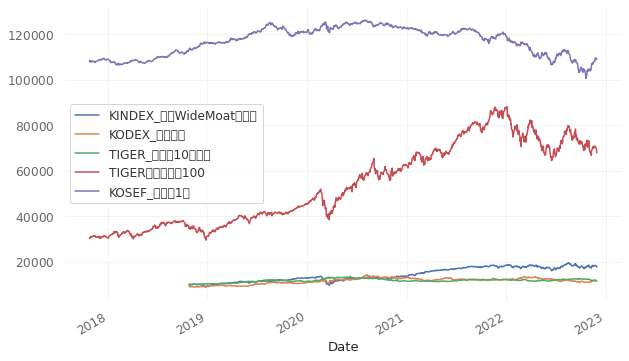

In [253]:
df_CORR = pd.concat([df_RU[RU_NAME],df_CU[CU_NAME]], axis=1)
df_CORR.plot()

In [254]:
df_CORR

,KINDEX_미국WideMoat가치주,KODEX_골드선물,TIGER_미국채10년선물,TIGER미국나스닥100,KOSEF_통안채1년
Date,,,,,
2017-10-25,NaN,NaN,NaN,30443,108509
2017-10-26,NaN,NaN,NaN,30251,108049
2017-10-27,NaN,NaN,NaN,30473,107828
2017-10-30,NaN,NaN,NaN,31102,108265
2017-10-31,NaN,NaN,NaN,30983,108011
...,...,...,...,...,...
2022-11-24,"18,380.00","11,625.00","11,735.00",70490,109365
2022-11-25,"18,340.00","11,640.00","11,730.00",70440,109460
2022-11-28,"18,205.00","11,610.00","11,870.00",69935,109575


In [255]:

TARGET_ETF =  RU_NAME[0]
corr = df_CORR.corr(method='pearson')
top10 = corr.sort_values(by=TARGET_ETF, ascending=False).head(6)[TARGET_ETF]
top10

KINDEX_미국WideMoat가치주    1.00
TIGER미국나스닥100           0.96
KODEX_골드선물              0.58
TIGER_미국채10년선물          0.36
KOSEF_통안채1년            -0.44
Name: KINDEX_미국WideMoat가치주, dtype: float64

In [256]:
df_CU = df_CU.resample('MS').first()
df_CU

,TIGER미국나스닥100,KOSEF_통안채1년
Date,,
2017-10-01,30443,108509
2017-11-01,31067,107785
2017-12-01,30748,108814
2018-01-01,30311,108984
2018-02-01,33233,106784
...,...,...
2022-07-01,66141,109485
2022-08-01,75148,112580
2022-09-01,73434,107330


In [257]:
def select_CU(x):
  try:
    asset = pd.Series([0,0], index=['ASSET', 'PRICE'])
    price  = df_CU.loc[x.name][x['selected']]
    
    asset['ASSET'] =x['selected']
    asset['PRICE'] = price
  except KeyError as e:
    print('keyError: ',e)
  return asset

In [258]:
df_CU[['ASSET', 'PRICE']] = df_ES.apply(lambda x: select_CU(x), axis=1)

In [259]:
df_CU

,TIGER미국나스닥100,KOSEF_통안채1년,ASSET,PRICE
Date,,,,
2017-10-01,30443,108509,KOSEF_통안채1년,108509
2017-11-01,31067,107785,KOSEF_통안채1년,107785
2017-12-01,30748,108814,KOSEF_통안채1년,108814
2018-01-01,30311,108984,KOSEF_통안채1년,108984
2018-02-01,33233,106784,KOSEF_통안채1년,106784
...,...,...,...,...
2022-07-01,66141,109485,KOSEF_통안채1년,109485
2022-08-01,75148,112580,KOSEF_통안채1년,112580
2022-09-01,73434,107330,KOSEF_통안채1년,107330


In [260]:
df_RU

,KINDEX_미국WideMoat가치주,KODEX_골드선물,TIGER_미국채10년선물
Date,,,
2018-10-25,9805,9105,10150
2018-10-26,9960,9080,10190
2018-10-29,9770,9055,10215
2018-10-30,9750,9000,10175
2018-10-31,9905,8945,10160
...,...,...,...
2022-11-24,18380,11625,11735
2022-11-25,18340,11640,11730
2022-11-28,18205,11610,11870


In [261]:
df_RU_year = df_RU.resample('MS').first()

In [262]:
df_RU_year

,KINDEX_미국WideMoat가치주,KODEX_골드선물,TIGER_미국채10년선물
Date,,,
2018-10-01,9805,9105,10150
2018-11-01,9890,8970,10135
2018-12-01,10100,8995,9955
2019-01-01,9250,9400,10265
2019-02-01,10070,9615,10330
2019-03-01,10570,9405,10290
2019-04-01,10590,9375,10600
2019-05-01,11280,9215,10875
2019-06-01,10625,9490,11325


In [263]:
profit_col_list = [col+'_P' for col in df_RU_year[RU_NAME].columns]
profit_col_list

['KINDEX_미국WideMoat가치주_P', 'KODEX_골드선물_P', 'TIGER_미국채10년선물_P']

In [264]:
df_RU_year[profit_col_list] = df_RU_year[RU_NAME].pct_change()

In [265]:
df_RU_year

,KINDEX_미국WideMoat가치주,KODEX_골드선물,TIGER_미국채10년선물,KINDEX_미국WideMoat가치주_P,KODEX_골드선물_P,TIGER_미국채10년선물_P
Date,,,,,,
2018-10-01,9805,9105,10150,NaN,NaN,NaN
2018-11-01,9890,8970,10135,0.01,-0.01,-0.00
2018-12-01,10100,8995,9955,0.02,0.00,-0.02
2019-01-01,9250,9400,10265,-0.08,0.05,0.03
2019-02-01,10070,9615,10330,0.09,0.02,0.01
2019-03-01,10570,9405,10290,0.05,-0.02,-0.00
2019-04-01,10590,9375,10600,0.00,-0.00,0.03
2019-05-01,11280,9215,10875,0.07,-0.02,0.03
2019-06-01,10625,9490,11325,-0.06,0.03,0.04


In [266]:
SLIPPAGE = 0.015
TRANSACTION_FEE = 0.00015

# 수익률 (RU_Yearly)


*   슬리피지 고려
*   수수료 고려



In [267]:
# 매월 수익률 & 누적 수익률
df_RU_year['PROFIT'] = 0
df_RU_year['PROFIT_ACC'] = 0
df_RU_year['LOG_PROFIT'] = 0
df_RU_year['LOG_PROFIT_ACC'] = 0

for i in range(len(df_RU_year)):
  profit = 0
  log_profit = 0

  if i != 0:
    for item in profit_col_list:
      profit += (df_RU_year[item].iloc[i] * 0.25)
    if profit <= 0:
      if df_RU_year.iloc[i].name.month == 12:
        profit = profit * (1 + SLIPPAGE + TRANSACTION_FEE)
      log_profit = math.log(1)
    else:
      if df_RU_year.iloc[i].name.month == 12:
        profit = profit * (1 - SLIPPAGE - TRANSACTION_FEE)
      log_profit = math.log(profit+1)
    # 수익률, 로그수익률 컬럼 추가. 누적수익률 공식은 외워야 할 듯...
    df_RU_year.loc[df_RU_year.index[i], 'PROFIT'] = profit 
    df_RU_year.loc[df_RU_year.index[i], 'PROFIT_ACC'] = (1+df_RU_year.loc[df_RU_year.index[i-1], 'PROFIT_ACC'])*(1+profit)-1 
    df_RU_year.loc[df_RU_year.index[i], 'LOG_PROFIT'] = log_profit 
    df_RU_year.loc[df_RU_year.index[i], 'LOG_PROFIT_ACC'] = df_RU_year.loc[df_RU_year.index[i-1], 'LOG_PROFIT_ACC'] + log_profit

# % 형태로 보기 위해 100 곱해줌 
df_RU_year[['PROFIT', 'PROFIT_ACC', 'LOG_PROFIT','LOG_PROFIT_ACC']] = df_RU_year[['PROFIT', 'PROFIT_ACC', 'LOG_PROFIT','LOG_PROFIT_ACC']] * 100
df_RU_year[profit_col_list] = df_RU_year[profit_col_list] * 100

In [268]:
df_RU_year

,KINDEX_미국WideMoat가치주,KODEX_골드선물,TIGER_미국채10년선물,KINDEX_미국WideMoat가치주_P,KODEX_골드선물_P,TIGER_미국채10년선물_P,PROFIT,PROFIT_ACC,LOG_PROFIT,LOG_PROFIT_ACC
Date,,,,,,,,,,
2018-10-01,9805,9105,10150,NaN,NaN,NaN,0.00,0.00,0.00,0.00
2018-11-01,9890,8970,10135,0.87,-1.48,-0.15,-0.19,-0.19,0.00,0.00
2018-12-01,10100,8995,9955,2.12,0.28,-1.78,0.15,-0.04,0.15,0.15
2019-01-01,9250,9400,10265,-8.42,4.50,3.11,-0.20,-0.24,0.00,0.15
2019-02-01,10070,9615,10330,8.86,2.29,0.63,2.95,2.70,2.90,3.06
2019-03-01,10570,9405,10290,4.97,-2.18,-0.39,0.60,3.32,0.60,3.65
2019-04-01,10590,9375,10600,0.19,-0.32,3.01,0.72,4.06,0.72,4.37
2019-05-01,11280,9215,10875,6.52,-1.71,2.59,1.85,5.99,1.83,6.21
2019-06-01,10625,9490,11325,-5.81,2.98,4.14,0.33,6.34,0.33,6.53


In [269]:
df_RU_year['PROFIT']

Date
2018-10-01    0.00
2018-11-01   -0.19
2018-12-01    0.15
2019-01-01   -0.20
2019-02-01    2.95
2019-03-01    0.60
2019-04-01    0.72
2019-05-01    1.85
2019-06-01    0.33
2019-07-01    2.26
2019-08-01    2.27
2019-09-01    3.27
2019-10-01   -0.99
2019-11-01    0.41
2019-12-01    0.61
2020-01-01    0.20
2020-02-01    2.95
2020-03-01   -0.77
2020-04-01   -1.72
2020-05-01    4.60
2020-06-01    2.75
2020-07-01   -0.36
2020-08-01    2.62
2020-09-01    0.77
2020-10-01   -2.58
2020-11-01   -2.55
2020-12-01    1.06
2021-01-01    1.52
2021-02-01    0.41
2021-03-01   -0.34
2021-04-01    0.71
2021-05-01    1.74
2021-06-01    1.67
2021-07-01   -0.20
2021-08-01    2.08
2021-09-01    0.60
2021-10-01   -1.14
2021-11-01    0.83
2021-12-01   -0.33
2022-01-01    1.91
2022-02-01   -0.87
2022-03-01    1.42
2022-04-01   -0.28
2022-05-01   -1.16
2022-06-01   -1.53
2022-07-01   -1.10
2022-08-01    2.98
2022-09-01   -1.21
2022-10-01    0.33
2022-11-01   -1.00
Freq: MS, Name: PROFIT, dtype: float64

[Performance Metrics]

                    Strategy
------------------  ----------
Start Period        2018-10-01
End Period          2022-11-01
Risk-Free Rate      0.0%
Time in Market      98.0%

Cumulative Return   31.46%
CAGR﹪              6.92%

Sharpe              5.65
Prob. Sharpe Ratio  99.63%
Sortino             11.96
Sortino/√2          8.46
Omega               2.51

Max Drawdown        -5.07%
Longest DD Days     243

Gain/Pain Ratio     1.51
Gain/Pain (1M)      1.51

Payoff Ratio        1.59
Profit Factor       2.51
Common Sense Ratio  4.57
CPC Index           2.45
Tail Ratio          1.82
Outlier Win Ratio   2.63
Outlier Loss Ratio  2.64

MTD                 -1.0%
3M                  1.04%
6M                  -2.74%
YTD                 -0.62%
1Y                  -0.13%
3Y (ann.)           4.95%
5Y (ann.)           6.92%
10Y (ann.)          6.92%
All-time (ann.)     6.92%

Avg. Drawdown       -1.7%
Avg. Drawdown Days  95
Recovery Factor     6.2
Ulcer Index         0.02
Sereni

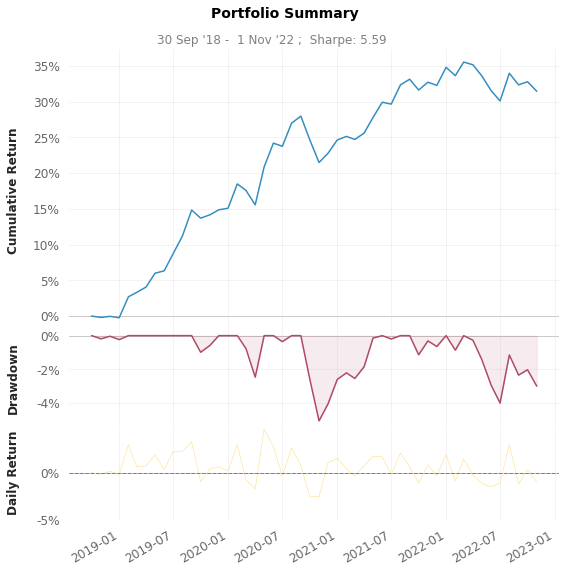

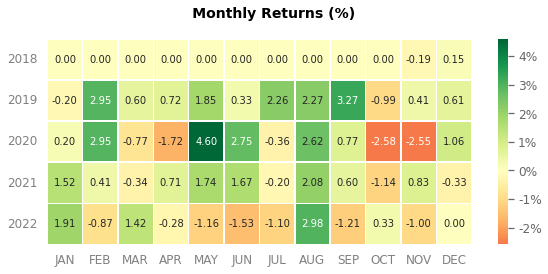

In [270]:
qs.reports.basic(df_RU_year['PROFIT']/100)

# 수익률 (CU_Monthly)




In [271]:
df_CU_month = df_CU

In [272]:
profit_col_list = [col+'_P' for col in df_CU_month[CU_NAME].columns]
profit_col_list

['TIGER미국나스닥100_P', 'KOSEF_통안채1년_P']

In [273]:
df_CU_month[CU_NAME].pct_change()

,TIGER미국나스닥100,KOSEF_통안채1년
Date,,
2017-10-01,NaN,NaN
2017-11-01,0.02,-0.01
2017-12-01,-0.01,0.01
2018-01-01,-0.01,0.00
2018-02-01,0.10,-0.02
...,...,...
2022-07-01,-0.06,-0.00
2022-08-01,0.14,0.03
2022-09-01,-0.02,-0.05


In [274]:
df_CU_month[profit_col_list] = df_CU_month[CU_NAME].pct_change()

In [275]:
df_CU_month

,TIGER미국나스닥100,KOSEF_통안채1년,ASSET,PRICE,TIGER미국나스닥100_P,KOSEF_통안채1년_P
Date,,,,,,
2017-10-01,30443,108509,KOSEF_통안채1년,108509,NaN,NaN
2017-11-01,31067,107785,KOSEF_통안채1년,107785,0.02,-0.01
2017-12-01,30748,108814,KOSEF_통안채1년,108814,-0.01,0.01
2018-01-01,30311,108984,KOSEF_통안채1년,108984,-0.01,0.00
2018-02-01,33233,106784,KOSEF_통안채1년,106784,0.10,-0.02
...,...,...,...,...,...,...
2022-07-01,66141,109485,KOSEF_통안채1년,109485,-0.06,-0.00
2022-08-01,75148,112580,KOSEF_통안채1년,112580,0.14,0.03
2022-09-01,73434,107330,KOSEF_통안채1년,107330,-0.02,-0.05


In [276]:
len(df_CU_month)

62

In [277]:
# 매월 수익률 & 누적 수익률
df_CU_month['PROFIT'] = 0
df_CU_month['PROFIT_ACC'] = 0
df_CU_month['LOG_PROFIT'] = 0
df_CU_month['LOG_PROFIT_ACC'] = 0

for i in range(len(df_CU_month)):
  profit = 0
  log_profit = 0

  if i != 0:
    profit = df_CU_month[df_CU_month.iloc[i-1]['ASSET'] + '_P'].iloc[i] * 0.25
    print(profit)
    if df_CU_month.iloc[i-1]['ASSET'] != df_CU_month.iloc[i]['ASSET']:
      if profit <= 0:
        profit = profit * (1 + SLIPPAGE + TRANSACTION_FEE)
      else:
        profit = profit * (1 - SLIPPAGE - TRANSACTION_FEE)
    if profit <= 0:
      log_profit = math.log(1)
    else:
      log_profit = math.log(profit+1)

    # 수익률, 로그수익률 컬럼 추가. 누적수익률 공식은 외워야 할 듯...
    df_CU_month.loc[df_CU_month.index[i], 'PROFIT'] = profit 
    df_CU_month.loc[df_CU_month.index[i], 'PROFIT_ACC'] = (1+df_CU_month.loc[df_CU_month.index[i-1], 'PROFIT_ACC'])*(1+profit)-1 
    df_CU_month.loc[df_CU_month.index[i], 'LOG_PROFIT'] = log_profit 
    df_CU_month.loc[df_CU_month.index[i], 'LOG_PROFIT_ACC'] = df_CU_month.loc[df_CU_month.index[i-1], 'LOG_PROFIT_ACC'] + log_profit

# % 형태로 보기 위해 100 곱해줌 
df_CU_month[['PROFIT', 'PROFIT_ACC', 'LOG_PROFIT','LOG_PROFIT_ACC']] = df_CU_month[['PROFIT', 'PROFIT_ACC', 'LOG_PROFIT','LOG_PROFIT_ACC']] * 100
df_CU_month[profit_col_list] = df_CU_month[profit_col_list] * 100

-0.0016680644001879907
0.002386695736883604
0.0003905747422206507
-0.00504661234676651
0.001496010638297851
0.002252776407287105
-0.0015245730734101404
0.0016012252854358255
0.003735473159933611
-0.0006270447110141852
0.006183721438723089
-0.000920171765396216
0.0029893365457546728
0.0029209470481901256
0.0036128301228972592
0.02387770774005693
-0.00028829356029638764
0.003943842780463003
-1.0602385112551405e-05
0.004209325405240327
0.0018018318623934104
0.004348114160772576
0.0014937887693134422
-0.002783712047646797
-0.0045233224222585855
0.0015793114368817252
0.000565231434321356
0.0028590315650305897
0.0038397437992222505
-0.003604647420424184
0.035577432881862436
0.0257231165214456
-0.00015843474494012244
0.002767342548443519
-0.00532721484316076
0.00266684513234855
-0.0023236587793366847
-0.0006764967998055538
-0.0010479625658023073
-0.0010503344754446142
-0.0026727563183549796
-0.0004657999337528973
-0.0018770481602853883
-0.0006269330435509368
0.002315008799128493
0.00368456013

In [278]:
df_CU_month['PROFIT'].tail(5)

Date
2022-07-01   -0.09
2022-08-01    0.71
2022-09-01   -1.17
2022-10-01   -0.42
2022-11-01   -0.22
Freq: MS, Name: PROFIT, dtype: float64

[Performance Metrics]

                    Strategy
------------------  ----------
Start Period        2017-10-01
End Period          2022-11-01
Risk-Free Rate      0.0%
Time in Market      99.0%

Cumulative Return   7.38%
CAGR﹪              1.41%

Sharpe              2.59
Prob. Sharpe Ratio  94.88%
Sortino             6.77
Sortino/√2          4.79
Omega               1.82

Max Drawdown        -4.46%
Longest DD Days     791

Gain/Pain Ratio     0.82
Gain/Pain (1M)      0.82

Payoff Ratio        2.14
Profit Factor       1.82
Common Sense Ratio  2.07
CPC Index           1.79
Tail Ratio          1.14
Outlier Win Ratio   5.26
Outlier Loss Ratio  3.39

MTD                 -0.22%
3M                  -1.1%
6M                  -1.9%
YTD                 -3.33%
1Y                  -3.12%
3Y (ann.)           0.76%
5Y (ann.)           1.49%
10Y (ann.)          1.41%
All-time (ann.)     1.41%

Avg. Drawdown       -0.64%
Avg. Drawdown Days  131
Recovery Factor     1.65
Ulcer Index         0.01
Seren

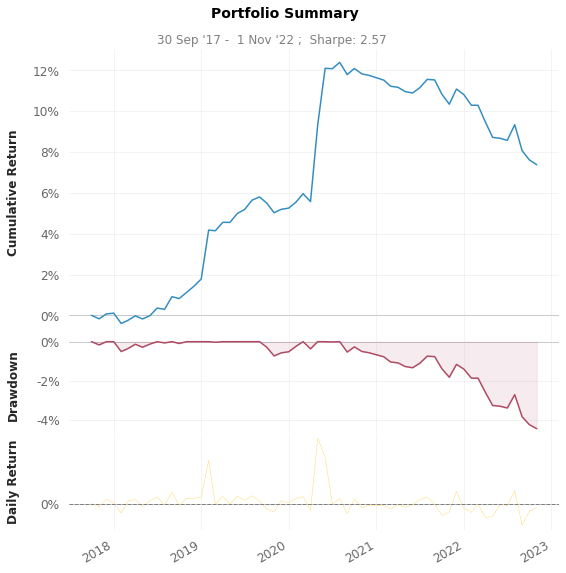

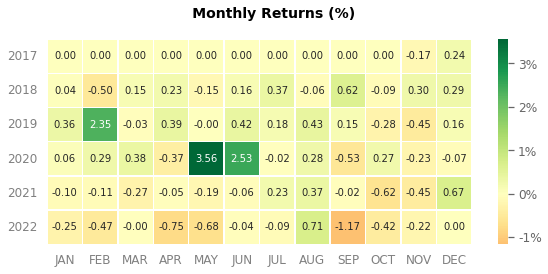

In [279]:
qs.reports.basic(df_CU_month['PROFIT']/100)

In [280]:
df_RCU_total = df_CU_month[['PROFIT',	'PROFIT_ACC',	'LOG_PROFIT',	'LOG_PROFIT_ACC']]
df_RCU_total

,PROFIT,PROFIT_ACC,LOG_PROFIT,LOG_PROFIT_ACC
Date,,,,
2017-10-01,0.00,0.00,0.00,0.00
2017-11-01,-0.17,-0.17,0.00,0.00
2017-12-01,0.24,0.07,0.24,0.24
2018-01-01,0.04,0.11,0.04,0.28
2018-02-01,-0.50,-0.39,0.00,0.28
...,...,...,...,...
2022-07-01,-0.09,8.57,0.00,15.34
2022-08-01,0.71,9.34,0.70,16.04
2022-09-01,-1.17,8.06,0.00,16.04


In [281]:
df_RU_year

,KINDEX_미국WideMoat가치주,KODEX_골드선물,TIGER_미국채10년선물,KINDEX_미국WideMoat가치주_P,KODEX_골드선물_P,TIGER_미국채10년선물_P,PROFIT,PROFIT_ACC,LOG_PROFIT,LOG_PROFIT_ACC
Date,,,,,,,,,,
2018-10-01,9805,9105,10150,NaN,NaN,NaN,0.00,0.00,0.00,0.00
2018-11-01,9890,8970,10135,0.87,-1.48,-0.15,-0.19,-0.19,0.00,0.00
2018-12-01,10100,8995,9955,2.12,0.28,-1.78,0.15,-0.04,0.15,0.15
2019-01-01,9250,9400,10265,-8.42,4.50,3.11,-0.20,-0.24,0.00,0.15
2019-02-01,10070,9615,10330,8.86,2.29,0.63,2.95,2.70,2.90,3.06
2019-03-01,10570,9405,10290,4.97,-2.18,-0.39,0.60,3.32,0.60,3.65
2019-04-01,10590,9375,10600,0.19,-0.32,3.01,0.72,4.06,0.72,4.37
2019-05-01,11280,9215,10875,6.52,-1.71,2.59,1.85,5.99,1.83,6.21
2019-06-01,10625,9490,11325,-5.81,2.98,4.14,0.33,6.34,0.33,6.53


# 투자수익률 (RU + CU)


*   RU x 0.75 + CU x 0.25



In [282]:

df_RCU_total = df_CU_month[['PROFIT',	'PROFIT_ACC',	'LOG_PROFIT',	'LOG_PROFIT_ACC']]
 
for i in range(len(df_RU_year)):
  name = df_RU_year.iloc[i].name
  try:
    df_RCU_total['PROFIT'].loc[name] += df_RU_year['PROFIT'].iloc[i]
    df_RCU_total['PROFIT_ACC'].loc[name] += df_RU_year['PROFIT_ACC'].iloc[i]
    df_RCU_total['LOG_PROFIT'].loc[name] += df_RU_year['LOG_PROFIT'].iloc[i]
    df_RCU_total['LOG_PROFIT_ACC'].loc[name] += df_RU_year['LOG_PROFIT_ACC'].iloc[i]
  except KeyError:
    print("Oops!  No date")


In [283]:
df_RCU_total

,PROFIT,PROFIT_ACC,LOG_PROFIT,LOG_PROFIT_ACC
Date,,,,
2017-10-01,0.00,0.00,0.00,0.00
2017-11-01,-0.17,-0.17,0.00,0.00
2017-12-01,0.24,0.07,0.24,0.24
2018-01-01,0.04,0.11,0.04,0.28
2018-02-01,-0.50,-0.39,0.00,0.28
...,...,...,...,...
2022-07-01,-1.19,38.67,0.00,58.09
2022-08-01,3.69,43.31,3.64,61.73
2022-09-01,-2.38,40.42,0.00,61.73


[Performance Metrics]

                    Strategy
------------------  ----------
Start Period        2017-10-01
End Period          2022-11-01
Risk-Free Rate      0.0%
Time in Market      99.0%

Cumulative Return   40.64%
CAGR﹪              6.93%

Sharpe              4.68
Prob. Sharpe Ratio  99.79%
Sortino             11.2
Sortino/√2          7.92
Omega               2.52

Max Drawdown        -5.61%
Longest DD Days     243

Gain/Pain Ratio     1.52
Gain/Pain (1M)      1.52

Payoff Ratio        1.42
Profit Factor       2.52
Common Sense Ratio  4.47
CPC Index           2.29
Tail Ratio          1.77
Outlier Win Ratio   4.38
Outlier Loss Ratio  2.4

MTD                 -1.22%
3M                  -0.1%
6M                  -4.63%
YTD                 -3.98%
1Y                  -3.28%
3Y (ann.)           5.64%
5Y (ann.)           7.21%
10Y (ann.)          6.93%
All-time (ann.)     6.93%

Avg. Drawdown       -1.7%
Avg. Drawdown Days  94
Recovery Factor     7.24
Ulcer Index         0.02
Sereni

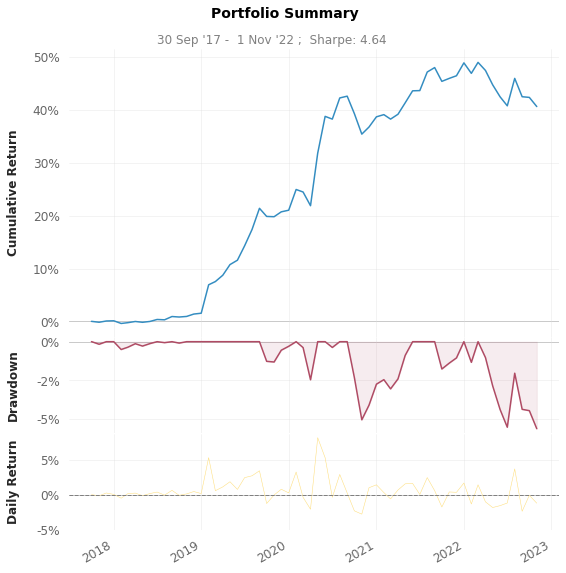

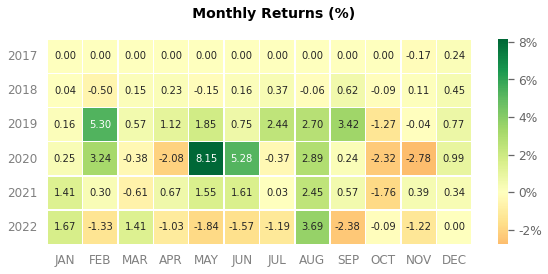

In [284]:
qs.reports.basic(df_RCU_total['PROFIT']/100)

# 참고

In [285]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [286]:
df_RCU_total

,PROFIT,PROFIT_ACC,LOG_PROFIT,LOG_PROFIT_ACC
Date,,,,
2017-10-01,0.00,0.00,0.00,0.00
2017-11-01,-0.17,-0.17,0.00,0.00
2017-12-01,0.24,0.07,0.24,0.24
2018-01-01,0.04,0.11,0.04,0.28
2018-02-01,-0.50,-0.39,0.00,0.28
...,...,...,...,...
2022-07-01,-1.19,38.67,0.00,58.09
2022-08-01,3.69,43.31,3.64,61.73
2022-09-01,-2.38,40.42,0.00,61.73


In [287]:
df_ES_Compare = df_ES[ES].pct_change()
df_ES_Compare

,^GSPC
Date,
2017-10-01,NaN
2017-11-01,0.01
2017-12-01,0.02
2018-01-01,0.02
2018-02-01,0.05
...,...
2022-07-01,-0.07
2022-08-01,0.08
2022-09-01,-0.04


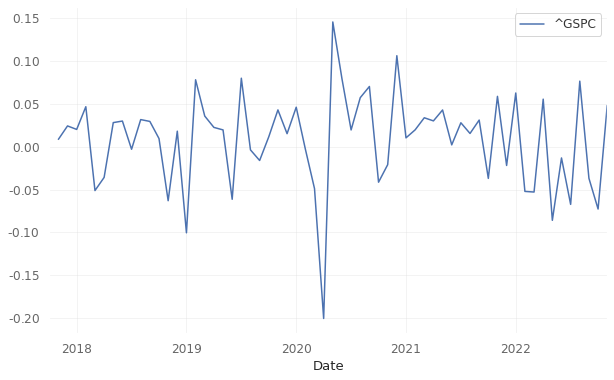

In [288]:
df_ES_Compare.plot()


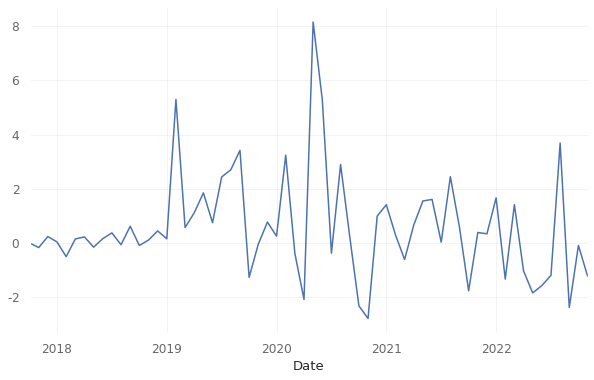

In [289]:
df_RCU_total['PROFIT'].plot()

In [290]:
df_Compare = pd.concat([df_RCU_total,df_ES_Compare], axis=1)
df_Compare

,PROFIT,PROFIT_ACC,LOG_PROFIT,LOG_PROFIT_ACC,^GSPC
Date,,,,,
2017-10-01,0.00,0.00,0.00,0.00,NaN
2017-11-01,-0.17,-0.17,0.00,0.00,0.01
2017-12-01,0.24,0.07,0.24,0.24,0.02
2018-01-01,0.04,0.11,0.04,0.28,0.02
2018-02-01,-0.50,-0.39,0.00,0.28,0.05
...,...,...,...,...,...
2022-07-01,-1.19,38.67,0.00,58.09,-0.07
2022-08-01,3.69,43.31,3.64,61.73,0.08
2022-09-01,-2.38,40.42,0.00,61.73,-0.04


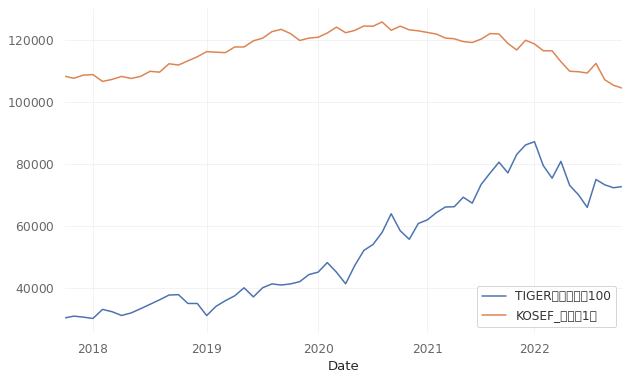

In [291]:
df_CU[[CU_NAME[0],CU_NAME[1]]].plot(logx=True)

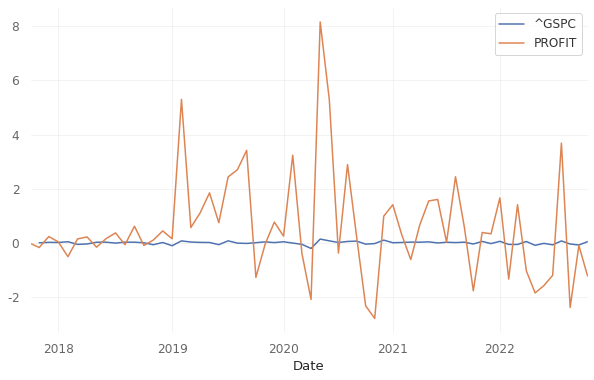

In [292]:
df_Compare[['^GSPC', 'PROFIT']].plot(logx=True)

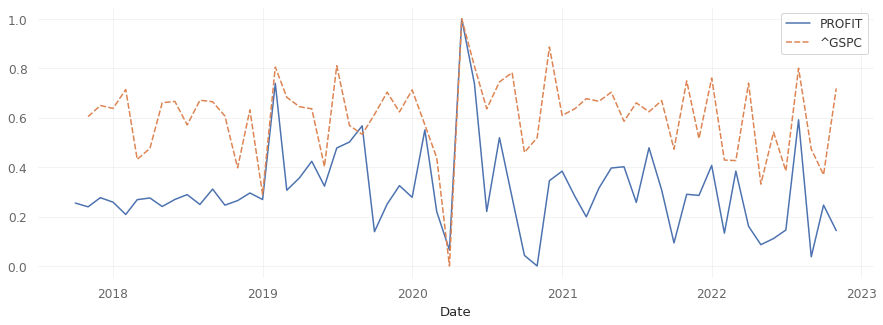

In [293]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_Compare) 
df_Compare.loc[:,:] = scaled_values 
plt.figure(figsize=(15,5)) 
sns.lineplot(data=df_Compare[['PROFIT','^GSPC']])


In [294]:

#ETF 간의 관계 분석하는데 사용
#국외 ETF에 대응하는 국내 ETF를 찾을때 사용 가능
# 상관계수 분석 
TARGET_ETF='PROFIT'
corr = df_Compare.corr(method='pearson') 
top10 = corr.sort_values(by=TARGET_ETF, ascending=False).head(5)[TARGET_ETF]
top10


PROFIT            1.00
LOG_PROFIT        0.94
^GSPC             0.55
PROFIT_ACC       -0.02
LOG_PROFIT_ACC   -0.10
Name: PROFIT, dtype: float64